# Springboard--DSC Program

# Capstone Project 1 - Exploratory Data Analysis 
### by Ellen A. Savoye

Previously, we cleaned up the text data by converting to lower case, and removing stopwords, emojis, emoticons, punctuation, and special characters. The output was pickled for further use. 

### Import packages and data

In [1]:
# !pip install wordcloud

In [2]:
import pandas as pd
import numpy as np

# libraries for NLP
import spacy

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import re
import unicodedata

import string
from string import punctuation

from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import swifter

# libraries for getting and moving data
import os
from os import path
import shutil
from zipfile import ZipFile

# for Images
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# necessary dependencies for text pre-processing

nlp = spacy.load('en_core_web_sm', parse=True, tag=True, entity=True)
#nlp_vec = spacy.load('en_vecs', parse = True, tag=True, #entity=True)
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [4]:
# Set directories
# src = "C:\\Users\\ellen\\Documents\\GitHub\\Data_Science_Career_Track\\Capstone_1\\Code\\"
# dst = "C:\\Users\\ellen\\Documents\\GitHub\\Data_Science_Career_Track\\Capstone_1\\Data\\"

# Work computer
src = "C:\\Users\\esavoye\\Documents\\GitHub\\Data_Science_Career_Track\\Capstone_1\\Code\\"
dst = "C:\\Users\\esavoye\\Documents\\GitHub\\Data_Science_Career_Track\\Capstone_1\\Data\\"

# Create pickle file for use in the future

unpickled_df = pd.read_pickle(dst + '/cleaned_train_data.pkl')


In [5]:
unpickled_df.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,clean_text
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,this is so cool its like would you want your m...
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,thank you this would make my life a lot less a...
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,this is such an urgent design problem kudos to...
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,rejected,0,0,0,0,0,0.0,0,4,is this something ill be able to install on my...
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,rejected,0,0,0,1,0,0.0,4,47,haha you guys are a bunch of losers


# Questions to ask

1) What is the frequency of words?
    - Are the words with the highest frequency stop words? Do they provide insights?

In [6]:
# adding length of comments and word count of each comment
unpickled_df['comment_len'] = unpickled_df['clean_text'].astype(str).swifter.apply(len)
unpickled_df['word_count'] = unpickled_df['clean_text'].swifter.apply(lambda x: len(str(x).split()))

In [7]:
#Check stopwords currently in list
print(stopword_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very',

In [8]:
# Create function to strip punctuation
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

In [9]:
#update stopword list to remove punctuation
stopword_list_updated = [strip_punctuation(word) for word in stopword_list] 

In [10]:
#Check stopwords currently in list
print(stopword_list_updated)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'shes', 'her', 'hers', 'herself', 'it', 'its', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'thatll', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', '

There are 516583979 words in the combination of all comments.


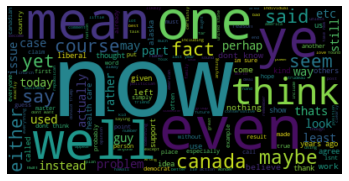

In [23]:
# All reviews:
text = " ".join(comment for comment in unpickled_df.clean_text)
print ("There are {} words in the combination of all comments.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Using a word cloud doesn't really give much insight. Looking at a 

In [12]:
# function to remove stop words
def remove_stopwords(list_of_words):
    words = [w for w in list_of_words if not w in stopword_list]
    return words

In [13]:
# remove stop words 
unpickled_df['clean_text_no_stpwd'] = unpickled_df['clean_text'].swifter.apply(lambda x: remove_stopwords(x))

In [14]:
# create dataframe for records with identity tags
slimmed_subset_df = unpickled_df.dropna(axis=0, subset=['female'])

In [17]:
# Creating a smaller 10% random sample data frame to test visualizations

slimmed_sample_subset_df = slimmed_subset_df.sample(frac=0.10)

In [18]:
slimmed_sample_subset_df.shape

(40513, 49)

In [19]:
# Create pickle file for records with identity tags

slimmed_sample_subset_df.to_pickle(dst + '/slimmed_sample_subset_df.pkl')
# slimmed_subset_df.to_pickle(dst + '/slimmed_subset_df.pkl')